# Wczytywanie danych

In [15]:
import pandas as pd

tshirts = pd.read_csv('t-shirts.csv')

tshirts_df = pd.DataFrame(tshirts)

print(tshirts_df.head(10))

print()

print(tshirts_df.describe(include='all'))

  size   material   color sleeves  demand
0    S      nylon   white    long  medium
1   XL  polyester   cream   short    high
2    S       silk    blue   short  medium
3    M     cotton   black   short  medium
4   XL  polyester  orange    long  medium
5   XS  polyester   black   short  medium
6  XXL  polyester   green   short  medium
7    L      linen  yellow   short    high
8   XL      linen   cream    long    high
9   XS      nylon     red   short    high

         size material  color sleeves demand
count   20000    20000  20000   20000  20000
unique      7        5     10       2      3
top         L    nylon  white    long   high
freq     4408     5652   3286   10117   8965


# Wizualizacja danych
## Distribution charts of size, material, color, sleeves and demand


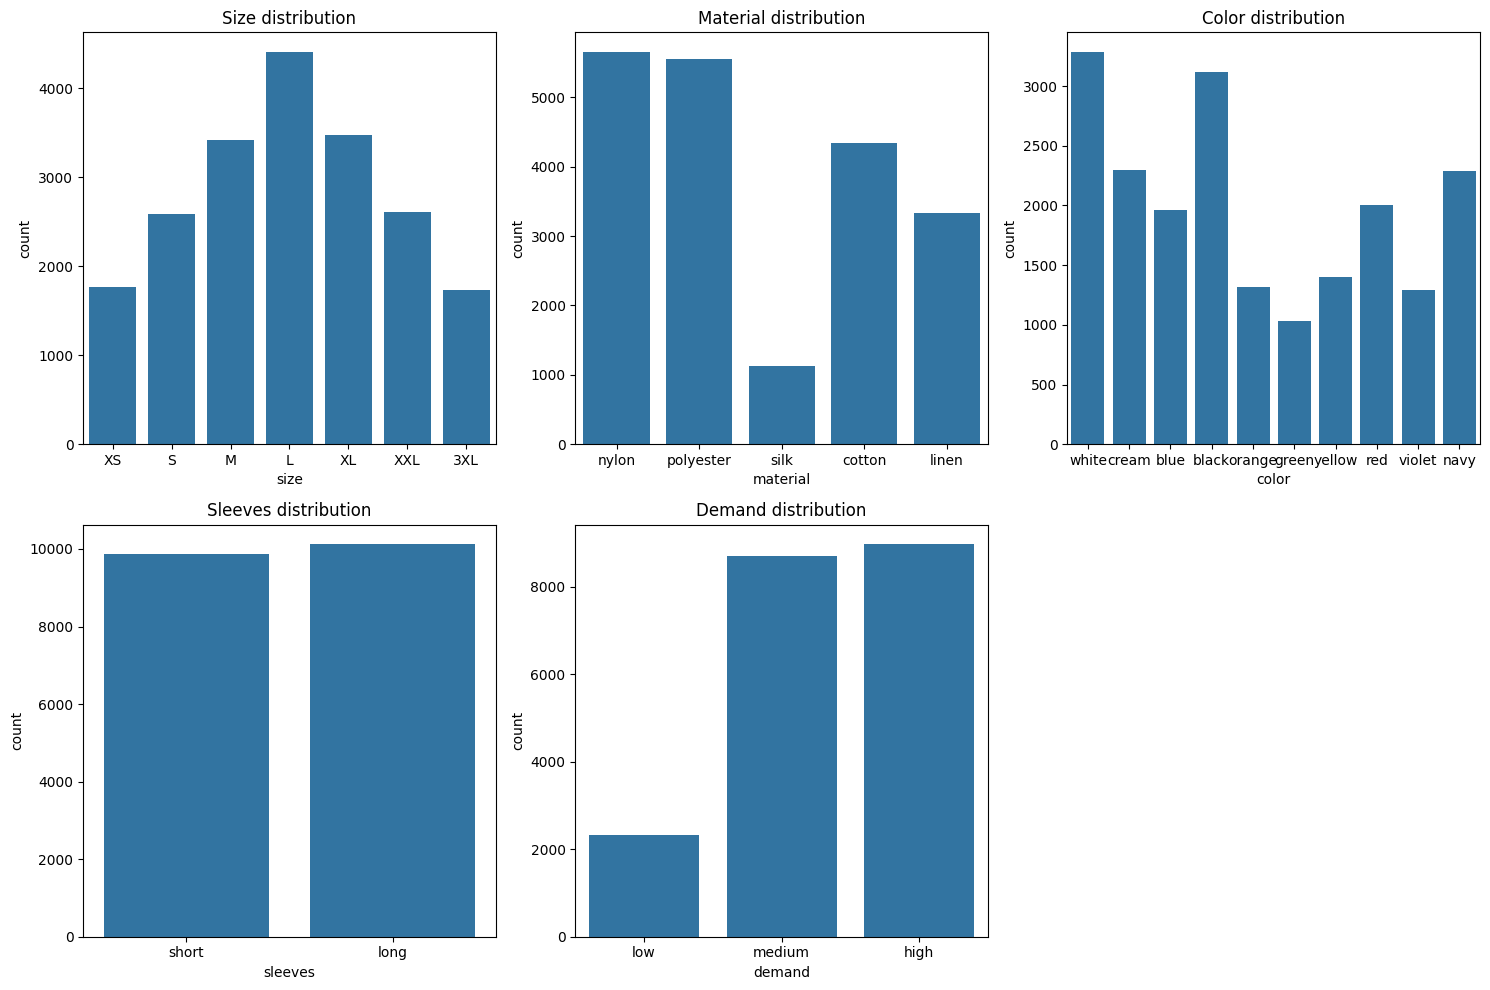

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='size', data=tshirts_df, order=['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL'])
plt.title('Size distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='material', data=tshirts_df, order=['nylon', 'polyester', 'silk', 'cotton', 'linen'])
plt.title('Material distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='color', data=tshirts_df, order=['white', 'cream', 'blue', 'black', 'orange', 'green', 'yellow', 'red', 'violet', 'navy'])
plt.title('Color distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='sleeves', data=tshirts_df, order=['short', 'long'])
plt.title('Sleeves distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='demand', data=tshirts_df, order=['low', 'medium', 'high'])
plt.title('Demand distribution')

plt.tight_layout()
plt.show()

## Correlation between demand and other characteristics

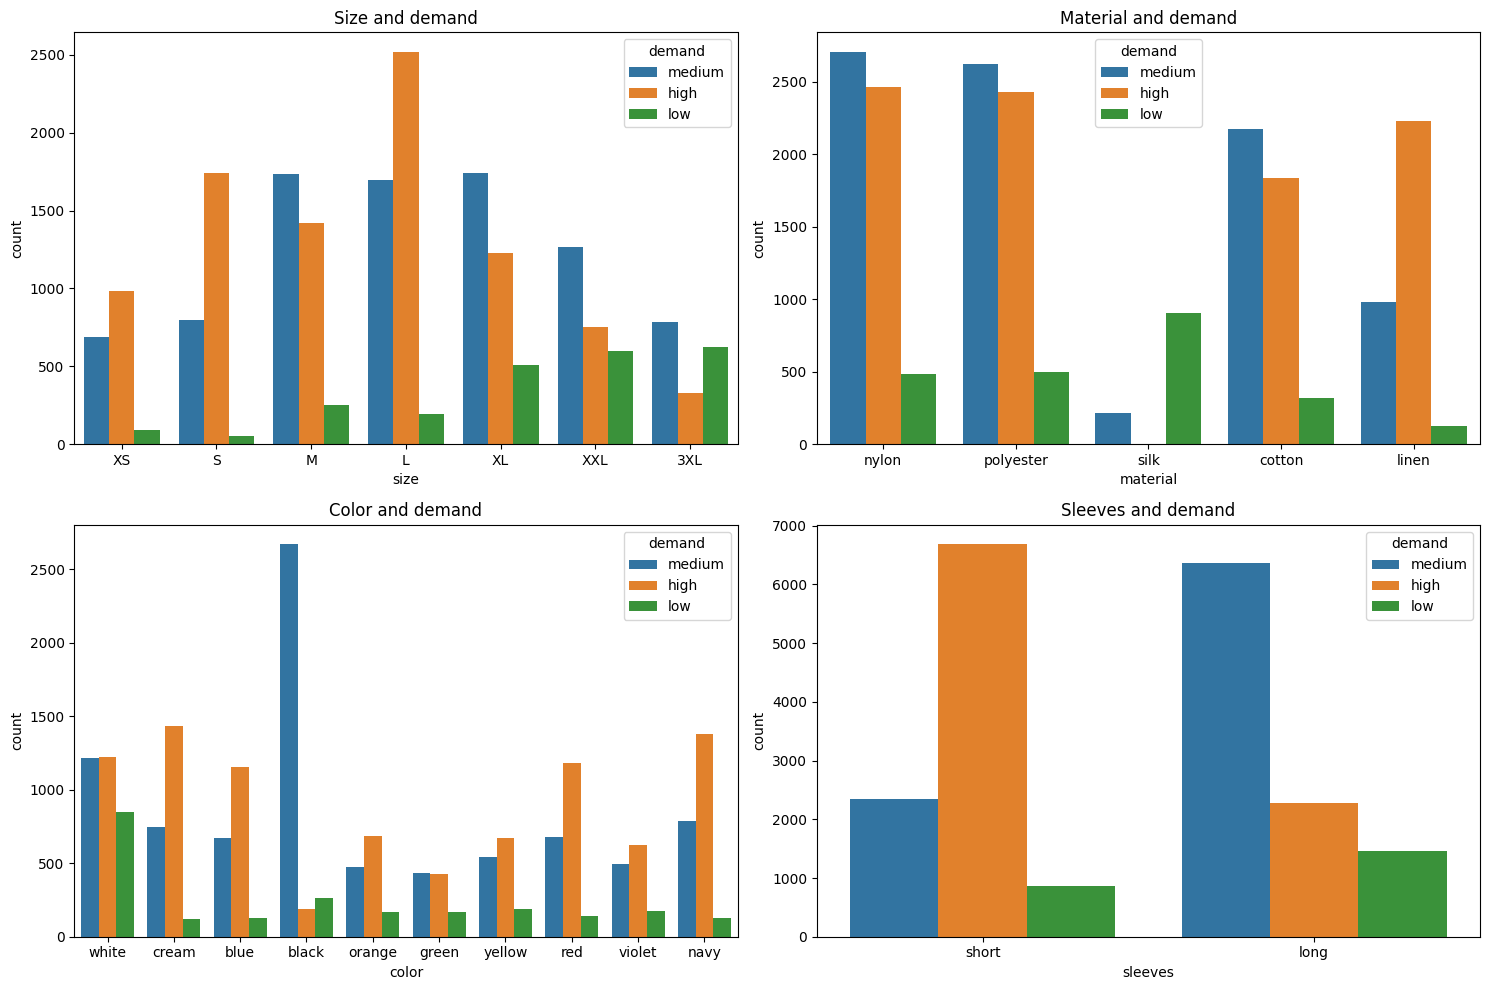

In [10]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='size', hue='demand', data=tshirts_df, order=['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL'])
plt.title('Size and demand')

plt.subplot(2, 2, 2)
sns.countplot(x='material', hue='demand', data=tshirts_df, order=['nylon', 'polyester', 'silk', 'cotton', 'linen'])
plt.title('Material and demand')

plt.subplot(2, 2, 3)
sns.countplot(x='color', hue='demand', data=tshirts_df, order=['white', 'cream', 'blue', 'black', 'orange', 'green', 'yellow', 'red', 'violet', 'navy'])
plt.title('Color and demand')

plt.subplot(2, 2, 4)
sns.countplot(x='sleeves', hue='demand', data=tshirts_df, order=['short', 'long'])
plt.title('Sleeves and demand')

plt.tight_layout()
plt.show()

## Correlation matrix

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(tshirts_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

ValueError: could not convert string to float: 'S'

<Figure size 1000x1000 with 0 Axes>

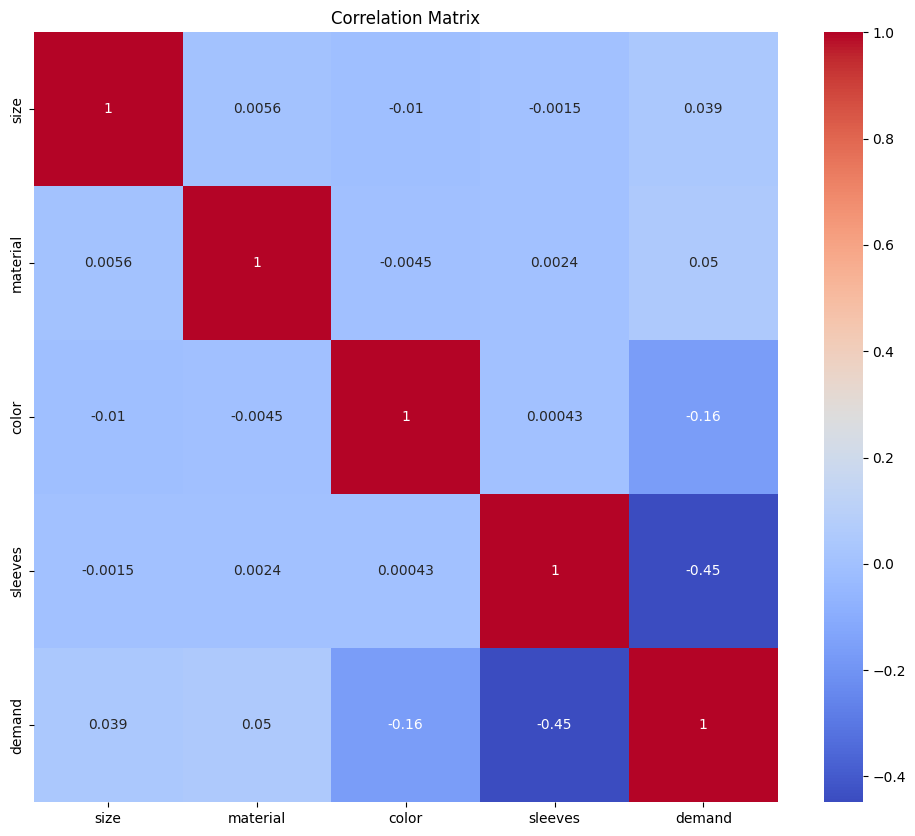

   size  material  color  sleeves  demand
0     3         2      8        0       2
1     4         3      2        1       0
2     3         4      1        1       2
3     2         0      0        1       2
4     4         3      5        0       2
5     5         3      0        1       2
6     6         3      3        1       2
7     1         1      9        1       0
8     4         1      2        0       0
9     5         2      6        1       0


In [19]:
from sklearn.preprocessing import LabelEncoder

tshirts = pd.read_csv('t-shirts.csv')
tshirts_df = pd.DataFrame(tshirts)

label_encoders = {}
for column in tshirts_df.columns:
    le = LabelEncoder()
    tshirts_df[column] = le.fit_transform(tshirts_df[column])
    label_encoders[column] = le

corr_matrix = tshirts_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

print(tshirts_df.head(10))

# Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = tshirts_df.drop('demand', axis=1)
y = tshirts_df['demand']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

processed_x_train = X_train.copy()
processed_x_val = X_val.copy()

scaler = StandardScaler()
processed_x_train = scaler.fit_transform(processed_x_train)
processed_x_val = scaler.transform(processed_x_val)

print(processed_x_train)
print()

processed2_x_train = X_train.copy()
processed2_x_val = X_val.copy()

scaler = MinMaxScaler()
processed2_x_train = scaler.fit_transform(processed2_x_train)
processed2_x_val = scaler.transform(processed2_x_val)


print(processed2_x_train)


[[ 1.66463121 -0.64894067  1.54444881 -0.98328257]
 [-1.52271827  0.99009404  0.56060409 -0.98328257]
 [-0.99149336 -0.64894067  0.56060409  1.01700165]
 ...
 [ 0.60218138  0.99009404 -0.75118887 -0.98328257]
 [-0.99149336  0.17057668 -1.07913711  1.01700165]
 [ 0.07095647 -0.64894067 -0.09529239  1.01700165]]

[[1.         0.25       1.         0.        ]
 [0.         0.75       0.66666667 0.        ]
 [0.16666667 0.25       0.66666667 1.        ]
 ...
 [0.66666667 0.75       0.22222222 0.        ]
 [0.16666667 0.5        0.11111111 1.        ]
 [0.5        0.25       0.44444444 1.        ]]


# Classification

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## Naive Bayes

In [29]:
nb_model = GaussianNB()

nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

nb_grid = GridSearchCV(estimator=nb_model, param_grid=nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train, y_train)

print("Best parameters for Naive Bayes:", nb_grid.best_params_)
nb_best_model = nb_grid.best_estimator_
nb_predictions = nb_best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, nb_predictions))
print(classification_report(y_val, nb_predictions))

Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Accuracy: 0.6706666666666666
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      2730
           1       0.82      0.07      0.13       668
           2       0.64      0.74      0.69      2602

    accuracy                           0.67      6000
   macro avg       0.72      0.52      0.51      6000
weighted avg       0.69      0.67      0.64      6000



## Decision Tree

In [30]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid.best_params_)
dt_best_model = dt_grid.best_estimator_
dt_predictions = dt_best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, dt_predictions))
print(classification_report(y_val, dt_predictions))

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.972
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2730
           1       0.94      0.94      0.94       668
           2       0.97      0.97      0.97      2602

    accuracy                           0.97      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.97      0.97      0.97      6000



# Metrics

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

def train_and_evaluate(model, X_val, y_val):
    predictions = model.predict(X_val)
    
    cm = confusion_matrix(y_val, predictions)
    
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions, average='weighted')
    recall = recall_score(y_val, predictions, average='weighted')
    f1 = f1_score(y_val, predictions, average='weighted')
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    # print("\nClassification Report:\n", classification_report(y_val, predictions))
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return model, accuracy, precision, recall, f1

## Naive Bayes with no scaling

Accuracy: 0.6706666666666666
Precision: 0.6861910571118657
Recall: 0.6706666666666666
F1-Score: 0.6419690947413336


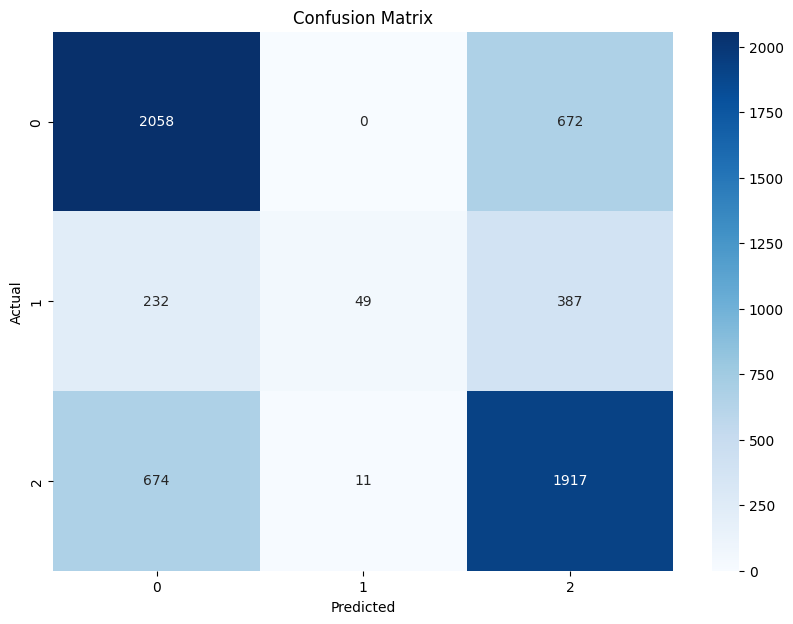

In [32]:
nb_model = GaussianNB(var_smoothing=1e-9)
nb_model.fit(X_train, y_train)

_, nb_accuracy, nb_precision, nb_recall, nb_f1 = train_and_evaluate(nb_model, X_val, y_val)

## Naive Bayes with Standard Scaler

Accuracy: 0.6706666666666666
Precision: 0.6861910571118657
Recall: 0.6706666666666666
F1-Score: 0.6419690947413336


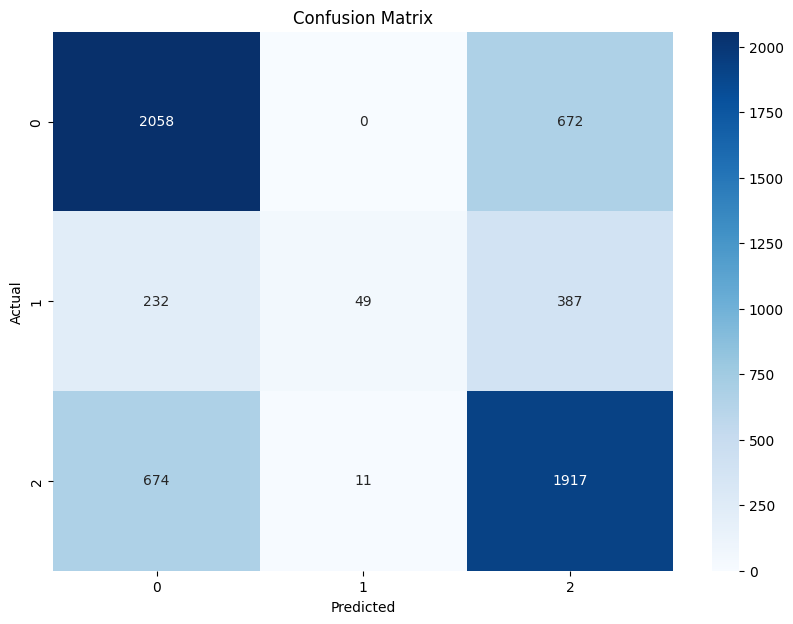

In [33]:
nb_model = GaussianNB(var_smoothing=1e-9)
nb_model.fit(processed_x_train, y_train)

_, nb_accuracy, nb_precision, nb_recall, nb_f1 = train_and_evaluate(nb_model, processed_x_val, y_val)

## Naive Bayes with MinMax Scaler

Accuracy: 0.6706666666666666
Precision: 0.6861910571118657
Recall: 0.6706666666666666
F1-Score: 0.6419690947413336


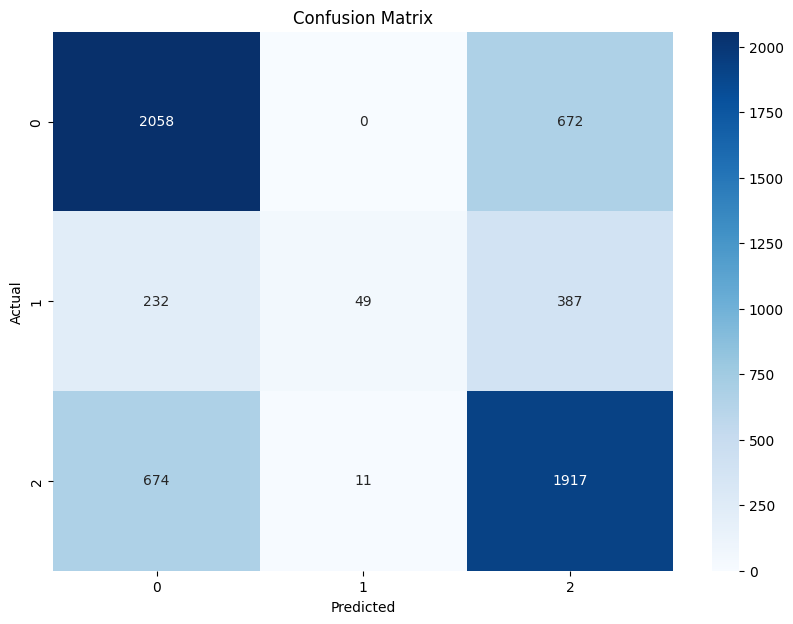

In [34]:
nb_model = GaussianNB(var_smoothing=1e-9)
nb_model.fit(processed2_x_train, y_train)

_, nb_accuracy, nb_precision, nb_recall, nb_f1 = train_and_evaluate(nb_model, processed2_x_val, y_val)

In [ ]:
## Decision Tree with no scaling

Accuracy: 0.972
Precision: 0.9720191175070854
Recall: 0.972
F1-Score: 0.9720040866068879


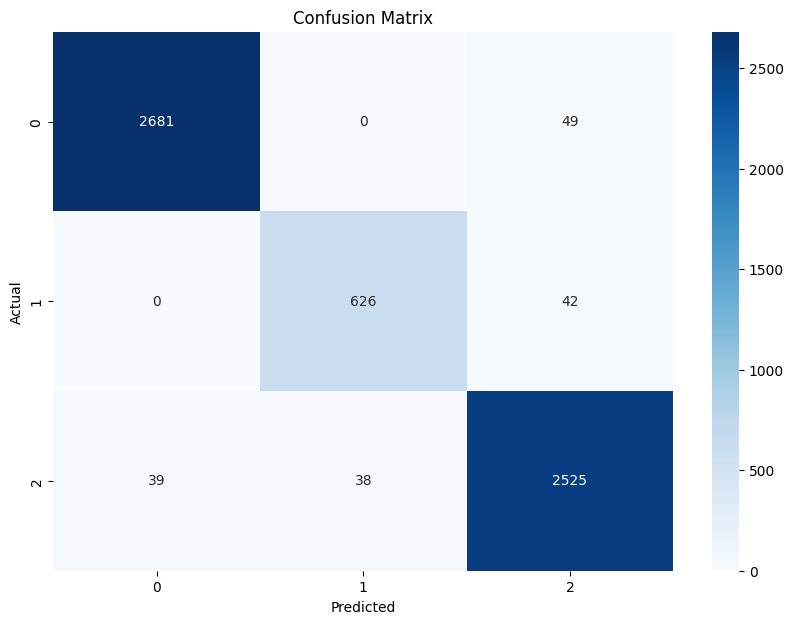

In [35]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model.fit(X_train, y_train)

_, dt_accuracy, dt_precision, dt_recall, dt_f1 = train_and_evaluate(dt_model, X_val, y_val)

## Decision Tree with Standard Scaler

Accuracy: 0.972
Precision: 0.9720191175070854
Recall: 0.972
F1-Score: 0.9720040866068879


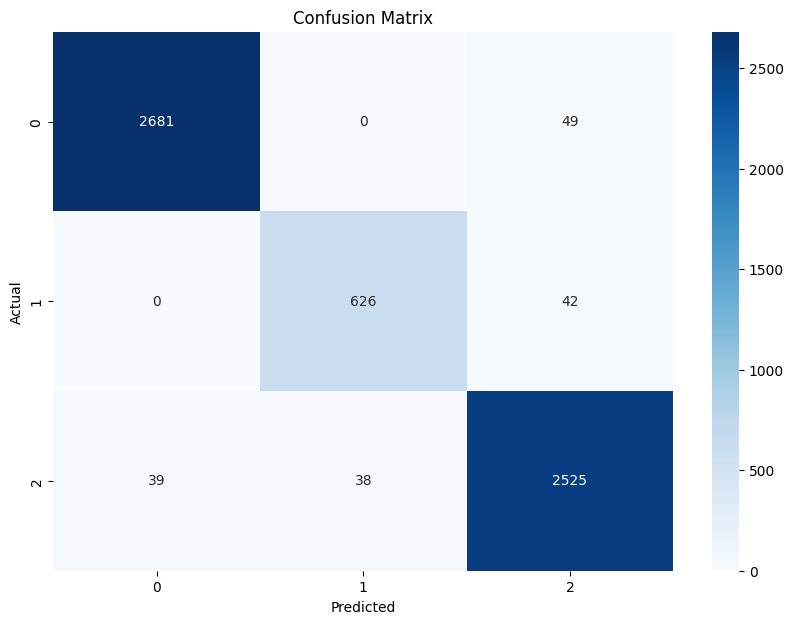

In [36]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model.fit(processed_x_train, y_train)

_, dt_accuracy, dt_precision, dt_recall, dt_f1 = train_and_evaluate(dt_model, processed_x_val, y_val)

## Decision Tree with MinMax Scaler

Accuracy: 0.972
Precision: 0.9720191175070854
Recall: 0.972
F1-Score: 0.9720040866068879


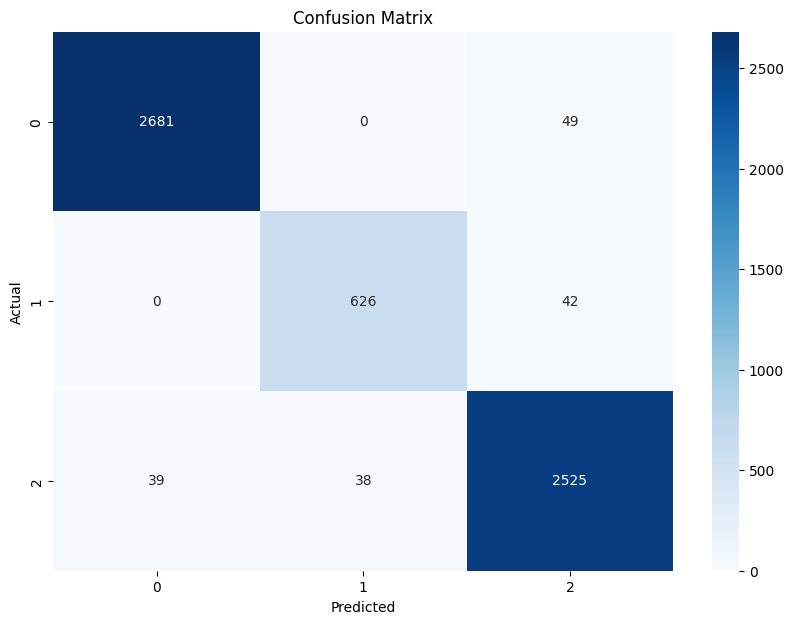

In [37]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model.fit(processed2_x_train, y_train)

_, dt_accuracy, dt_precision, dt_recall, dt_f1 = train_and_evaluate(dt_model, processed2_x_val, y_val)